- Name: Aniket Kale
- R programming project

# NN
- We will focus on fully connected neural networks which are commonly called DNN in data science.

- What is NN ?
- Neural networks are one of the most beautiful programming paradigms ever invented. 
- In the conventional approach to programming, we tell the computer what to do, breaking big problems up into many small, precisely defined tasks that the computer can easily perform. By contrast, in a neural network we don't tell the computer how to solve our problem. Instead, it learns from observational data, 
- figuring out its own solution to the problem at hand.

- I have already build one NN package in R. So we can see the details here.
- https://github.com/andy12290/R-Programming-HW1/blob/master/Assignment-10.ipynb

# Why we need NN ?

- Especially for these complex and high-dimensional data that feature engineers can’t capture easily.
- NN capture the Features easily as Its used the deep architecture of NN    

# Why then we need to build the NN from scratch
- Sometimes, we can used and process all the data by writing one line by importing r package.
- but to understand what is exactly going in NN behind the scenes is very important for the begineer.

# y = M*x + C

In [1]:
# dimension: 2X2
input <- matrix(1:4, nrow=2, ncol=2)
weights <- matrix(1:6, nrow=2, ncol=3)
bias <- matrix(1:3, nrow=1, ncol=3)
print(input)
print(weights)
print(bias)

     [,1] [,2]
[1,]    1    3
[2,]    2    4
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
     [,1] [,2] [,3]
[1,]    1    2    3


In [2]:
s1 <- input %*% weights + matrix(rep(bias, each=2), ncol=3) 
s1

8,17,26
11,24,37


In [3]:
# Another method is we have to calculate the max value from the matrix
max(0, s1)

[1] 37

In [4]:
pmax(0,s1)

[1]  8 11 17 24 26 37

# We will see the one NN
# neuron.ij <- max(0, input %*% weight + bias)

In [5]:
# We will buid the NN
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [6]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# General Structure:

# 4 Inputs
# One hidden layers
# 3 Predicted probabilities for 3 classes

In [7]:
predict.dnn <- function(model, data = X.test) {
    # new data, transfer to matrix
    new.data <- data.matrix(data)
    # Feed Forwad
    hidden.layer <- sweep(new.data %*% model$W1 ,2, model$b1, '+') # 2 represent column
    # neurons : Rectified Linear
    hidden.layer <- pmax(hidden.layer, 0)
    
    score <- sweep(hidden.layer %*% model$W2, 2, model$b2, '+')
    
    # Loss Function: softmax
    
    score.exp <- exp(score)
    
    probs <-sweep(score.exp, 1, rowSums(score.exp), '/') # 1 represent the Rows
    
    # select max possiblity
    labels.predicted <- max.col(probs)
    return(labels.predicted)

}

# Training model:
# feed forward 
# back propagation
# In back propogation we are using the RElU function as Activation function
# it computes point-wise y=max(ϵ,x)y=max(ϵ,x).

- List of 7
- D : int 4
- H : num 6
- K : int 3
- W1: num [1:4, 1:6] # 4 inputs and 6 outputs
- b1: num [1, 1:6] 6 cols
- W2: num [1:6, 1:3] 6 inputs and 3 outputs
- b2: num [1, 1:3] # 3 cols 

In [8]:
# Train: build and train a 2-layers neural network 
train.dnn <- function(x, y, traindata=data, testdata=NULL,
                  # set hidden layers and neurons
                  # currently, only support 1 hidden layer
                  hidden=c(6), 
                  # max iteration steps
                  maxit=2000,
                  # delta loss 
                  abstol=1e-2,
                  # learning rate
                  lr = 1e-2,
                  # regularization rate
                  reg = 1e-3,
                  # show results every 'display' step
                  display = 100,
                  random.seed = 1)
{
  # to make the case reproducible.
  set.seed(random.seed)
 
  # total number of training set
  N <- nrow(traindata)
 
  # extract the data and label
  # don't need atribute 
  X <- unname(data.matrix(traindata[,x]))
  Y <- traindata[,y]
  if(is.factor(Y)) { Y <- as.integer(Y) }
 # create index for both row and col
  Y.len   <- length(unique(Y))
  Y.set   <- sort(unique(Y))
  Y.index <- cbind(1:N, match(Y, Y.set))
 
  # number of input features
  D <- ncol(X)
  # number of categories for classification
  K <- length(unique(Y))
  H <-  hidden
 
  # create and init weights and bias 
  W1 <- 0.01*matrix(rnorm(D*H), nrow=D, ncol=H)
  b1 <- matrix(0, nrow=1, ncol=H)
 
  W2 <- 0.01*matrix(rnorm(H*K), nrow=H, ncol=K)
  b2 <- matrix(0, nrow=1, ncol=K)
 
  # use all train data to update weights since it's a small dataset
  batchsize <- N
  # updated: March 17. 2016
  # init loss to a very big value
  loss <- 100000
 
  # Training the network
  i <- 0
  while(i < maxit && loss > abstol ) {
 
    # iteration index
    i <- i +1
 
    # forward ....
    # 1 indicate row, 2 indicate col
    hidden.layer <- sweep(X %*% W1 ,2, b1, '+')
    # neurons : ReLU
    hidden.layer <- pmax(hidden.layer, 0)
    score <- sweep(hidden.layer %*% W2, 2, b2, '+')
 
    # softmax
    score.exp <- exp(score)
    probs <-sweep(score.exp, 1, rowSums(score.exp), '/') 
 
    # compute the loss
    corect.logprobs <- -log(probs[Y.index])
    data.loss  <- sum(corect.logprobs)/batchsize
    reg.loss   <- 0.5*reg* (sum(W1*W1) + sum(W2*W2))
    loss <- data.loss + reg.loss
 
    # display results and update model
    if( i %% display == 0) {
        if(!is.null(testdata)) {
            model <- list( D = D,
                           H = H,
                           K = K,
                           # weights and bias
                           W1 = W1, 
                           b1 = b1, 
                           W2 = W2, 
                           b2 = b2)
            labs <- predict.dnn(model, testdata[,-y])      
            # updated: 10.March.2016
            accuracy <- mean(as.integer(testdata[,y]) == Y.set[labs])
            cat(i, loss, accuracy, "\n")
        } else {
            cat(i, loss, "\n")
        }
    }
      
      
    # backward ....
    dscores <- probs
    dscores[Y.index] <- dscores[Y.index] -1
    dscores <- dscores / batchsize
 
 
    dW2 <- t(hidden.layer) %*% dscores 
    db2 <- colSums(dscores)
 
    dhidden <- dscores %*% t(W2)
    dhidden[hidden.layer <= 0] <- 0
 
    dW1 <- t(X) %*% dhidden
    db1 <- colSums(dhidden) 
 
    # update ....
    dW2 <- dW2 + reg*W2
    dW1 <- dW1  + reg*W1
 
    W1 <- W1 - lr * dW1
    b1 <- b1 - lr * db1
 
    W2 <- W2 - lr * dW2
    b2 <- b2 - lr * db2
 
  }
 
  # final results
  # creat list to store learned parameters
  # you can add more parameters for debug and visualization
  # such as residuals, fitted.values ...
  model <- list( D = D,
                 H = H,
                 K = K,
                 # weights and bias
                 W1= W1, 
                 b1= b1, 
                 W2= W2, 
                 b2= b2)
 
  return(model)
}

In [9]:
set.seed(1)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

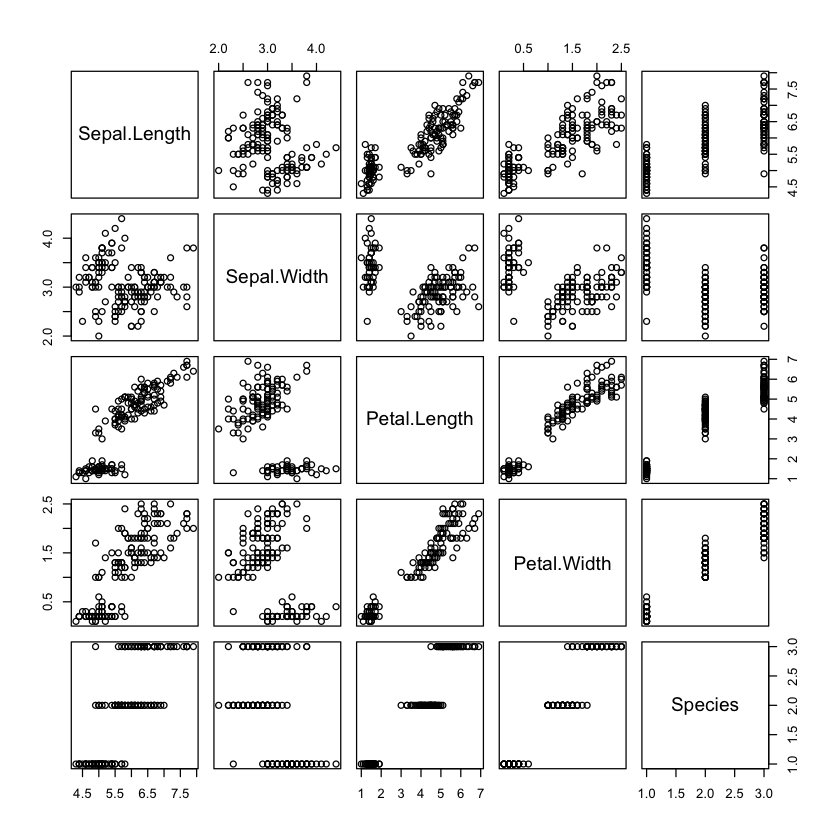

In [10]:
summary(iris)
plot(iris)

In [20]:
samp <- c(sample(1:50,25), sample(51:100,25), sample(101:150,25))

In [12]:
ir.model <- train.dnn(x=1:4, y=5, traindata=iris[samp,], testdata=iris[-samp,], hidden=10, maxit=2000, display=50)

50 1.097747 0.3333333 
100 1.095888 0.3333333 
150 1.090738 0.3333333 
200 1.077665 0.3333333 
250 1.051078 0.3333333 
300 1.007533 0.3466667 
350 0.940611 0.6666667 
400 0.8653486 0.6666667 
450 0.7889339 0.6666667 
500 0.7063496 0.6666667 
550 0.6284118 0.68 
600 0.5666252 0.68 
650 0.5203188 0.7466667 
700 0.4848238 0.84 
750 0.4561792 0.8933333 
800 0.4317895 0.92 
850 0.410091 0.9333333 
900 0.3901723 0.96 
950 0.371518 0.96 
1000 0.3538767 0.96 
1050 0.3371221 0.9733333 
1100 0.3212142 0.9866667 
1150 0.306155 0.9866667 
1200 0.2919613 0.9866667 
1250 0.2786476 0.9866667 
1300 0.2662152 0.9866667 
1350 0.2546561 0.9866667 
1400 0.243942 0.9866667 
1450 0.2340362 0.9866667 
1500 0.2248959 0.9866667 
1550 0.2164714 0.9866667 
1600 0.2087111 0.9866667 
1650 0.2015615 0.9866667 
1700 0.1949712 0.9866667 
1750 0.1888915 0.9866667 
1800 0.1832765 0.9866667 
1850 0.1780835 0.9866667 
1900 0.1732734 0.9866667 
1950 0.1688107 0.9866667 
2000 0.164663 0.9866667 


In [13]:
labels.dnn <- predict.dnn(ir.model, iris[-samp, -5])
print(labels.dnn)

 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3


In [14]:
table(iris[-samp,5], labels.dnn)

            labels.dnn
              1  2  3
  setosa     25  0  0
  versicolor  0 24  1
  virginica   0  0 25

In [15]:
mean(as.integer(iris[-samp, 5]) == labels.dnn)

[1] 0.9866667

In [26]:
head(ird)

Sepal.L.,Sepal.W.,Petal.L.,Petal.W.,species
5.1,3.5,1.4,0.2,s
4.9,3.0,1.4,0.2,s
4.7,3.2,1.3,0.2,s
4.6,3.1,1.5,0.2,s
5.0,3.6,1.4,0.2,s
5.4,3.9,1.7,0.4,s


In [25]:
# Compare with nnet
library(nnet)
ird <- data.frame(rbind(iris3[,,1], iris3[,,2], iris3[,,3]),
                  species = factor(c(rep("s",50), rep("c", 50), rep("v", 50))))
ir.nn2 <- nnet(species ~ ., data = ird, subset = samp, size = 6, rang = 0.1,
               decay = 1e-2, maxit = 2000)

# weights:  51
initial  value 82.470741 
iter  10 value 35.086235
iter  20 value 6.871188
iter  30 value 3.554167
iter  40 value 3.242654
iter  50 value 3.095204
iter  60 value 2.947755
iter  70 value 2.900790
iter  80 value 2.831001
iter  90 value 2.807830
iter 100 value 2.804034
iter 110 value 2.799213
iter 120 value 2.783762
iter 130 value 2.738869
iter 140 value 2.712076
iter 150 value 2.708837
iter 160 value 2.708195
iter 170 value 2.708150
final  value 2.708149 
converged


In [17]:
labels.nnet <- predict(ir.nn2, ird[-samp,], type="class")
table(ird$species[-samp], labels.nnet)

   labels.nnet
     c  s  v
  c 24  0  1
  s  0 25  0
  v  3  0 22

In [18]:
mean(ird$species[-samp] == labels.nnet)

[1] 0.9466667

# Google Tensflow 
- http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.90689&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Conclusion: We have used our own NN and the NNET package NN
# We can see the difference its almost the same accuracy we got in both the cases.